In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import GridSearchCV


%matplotlib inline

In [2]:
import os
CURR_DIR = os.getcwd()
print(f"CURR_DIR: {CURR_DIR}")

BRCA_DATA_DIR = os.path.join(CURR_DIR, '..', 'data')
TRAINING_DATA_CSV = 'training_data_70_perc.csv'
TESTING_DATA_CSV = 'testing_data_30_perc.csv'

TRAINING_DATA_CSV_PATH = os.path.normpath(os.path.join(BRCA_DATA_DIR, TRAINING_DATA_CSV))
TESTING_DATA_CSV_PATH = os.path.normpath(os.path.join(BRCA_DATA_DIR, TESTING_DATA_CSV))

print(f"TRAINING_DATA_CSV_PATH: {TRAINING_DATA_CSV_PATH}, TESTING_DATA_CSV_PATH: {TESTING_DATA_CSV_PATH}")


CURR_DIR: /home/akila/Documents/NUS_MComp/Academics/AY19-20_sem2/IS5152_Data-driven decision_making/group_project/IS5152-classification-BRCA/SVM-method
TRAINING_DATA_CSV_PATH: /home/akila/Documents/NUS_MComp/Academics/AY19-20_sem2/IS5152_Data-driven decision_making/group_project/IS5152-classification-BRCA/data/training_data_70_perc.csv, TESTING_DATA_CSV_PATH: /home/akila/Documents/NUS_MComp/Academics/AY19-20_sem2/IS5152_Data-driven decision_making/group_project/IS5152-classification-BRCA/data/testing_data_30_perc.csv


In [3]:
print("Training dataset")
df_cancer_train = pd.read_csv(TRAINING_DATA_CSV_PATH)
print(df_cancer_train.shape)
df_cancer_train.head()

Training dataset
(398, 32)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,'concave points_mean',...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,'concave points_worst',symmetry_worst,fractal_dimension_worst
0,908445,M,18.82,21.97,123.70,1110.0,0.10180,0.13890,0.15940,0.08744,...,22.66,30.93,145.3,1603.0,0.1390,0.3463,0.3912,0.17080,0.3007,0.08314
1,888570,M,17.29,22.13,114.40,947.8,0.08999,0.12730,0.09697,0.07507,...,20.39,27.24,137.9,1295.0,0.1134,0.2867,0.2298,0.15280,0.3067,0.07484
2,865432,B,14.50,10.89,94.28,640.7,0.11010,0.10990,0.08842,0.05778,...,15.70,15.98,102.8,745.5,0.1313,0.1788,0.2560,0.12210,0.2889,0.08006
3,909445,M,17.27,25.42,112.40,928.8,0.08331,0.11090,0.12040,0.05736,...,20.38,35.46,132.8,1284.0,0.1436,0.4122,0.5036,0.17390,0.2500,0.07944
4,89511502,B,12.67,17.30,81.25,489.9,0.10280,0.07664,0.03193,0.02107,...,13.71,21.10,88.7,574.4,0.1384,0.1212,0.1020,0.05602,0.2688,0.06888


In [4]:
print("Testing dataset")
df_cancer_test = pd.read_csv(TESTING_DATA_CSV_PATH)
print(df_cancer_test.shape)
df_cancer_test.head()

Testing dataset
(171, 32)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,'concave points_mean',...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,'concave points_worst',symmetry_worst,fractal_dimension_worst
0,911320501,B,11.600,18.36,73.88,412.7,0.08508,0.05855,0.03367,0.01777,...,12.77,24.02,82.68,495.1,0.1342,0.1808,0.1860,0.08288,0.3210,0.07863
1,842517,M,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902
2,84300903,M,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758
3,872608,B,9.904,18.06,64.60,302.4,0.09699,0.12940,0.13070,0.03716,...,11.26,24.39,73.07,390.2,0.1301,0.2950,0.3486,0.09910,0.2614,0.11620
4,88143502,B,14.340,13.47,92.51,641.2,0.09906,0.07624,0.05724,0.04603,...,16.77,16.90,110.40,873.2,0.1297,0.1525,0.1632,0.10870,0.3062,0.06072


In [5]:
muted    = ["#4878CF", "#6ACC65", "#D65F5F", "#B47CC7", "#C4AD66", "#77BEDB"]
BRCA_palette   = dict(B = muted[0], M = muted[2])

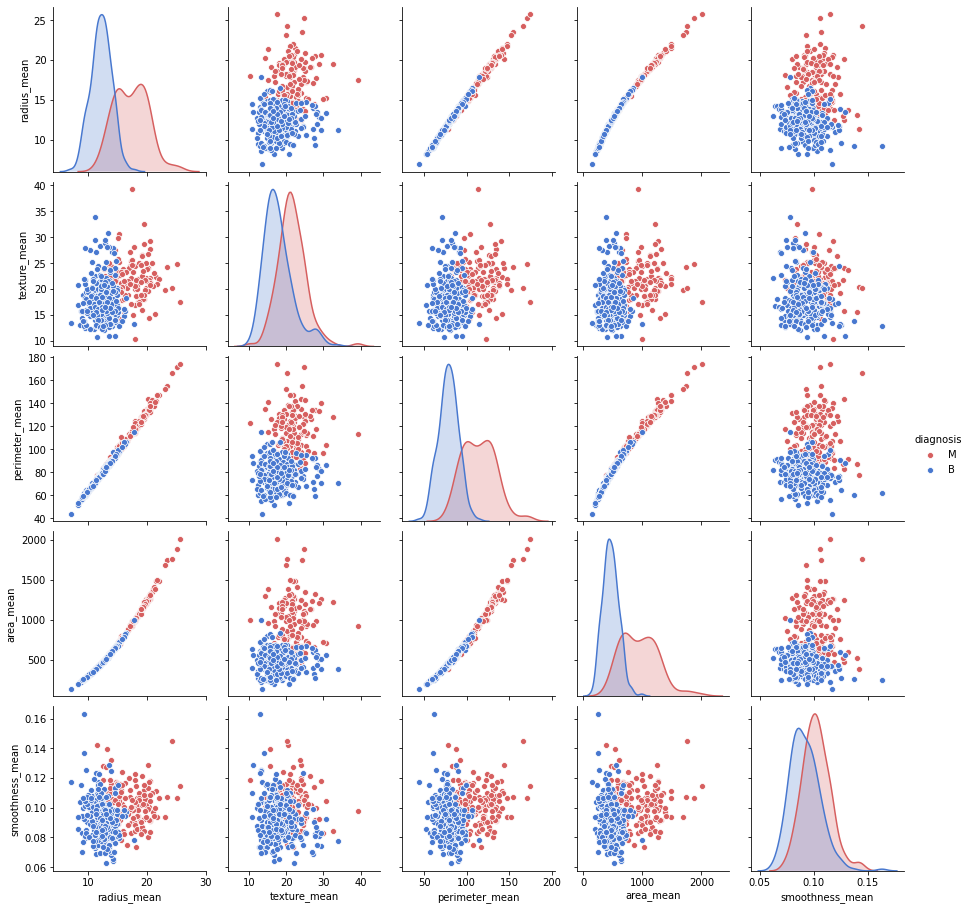

In [6]:
sns.pairplot(df_cancer_train, hue = 'diagnosis', vars = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean'], palette=BRCA_palette)

In [7]:
df_cancer_train['diagnosis'].value_counts()

B    253
M    145
Name: diagnosis, dtype: int64

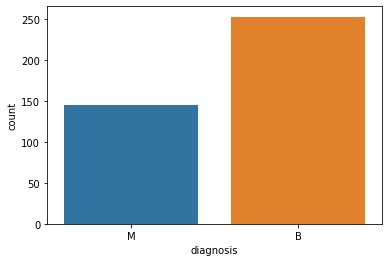

In [8]:
sns.countplot(df_cancer_train['diagnosis'], label = "Count") 

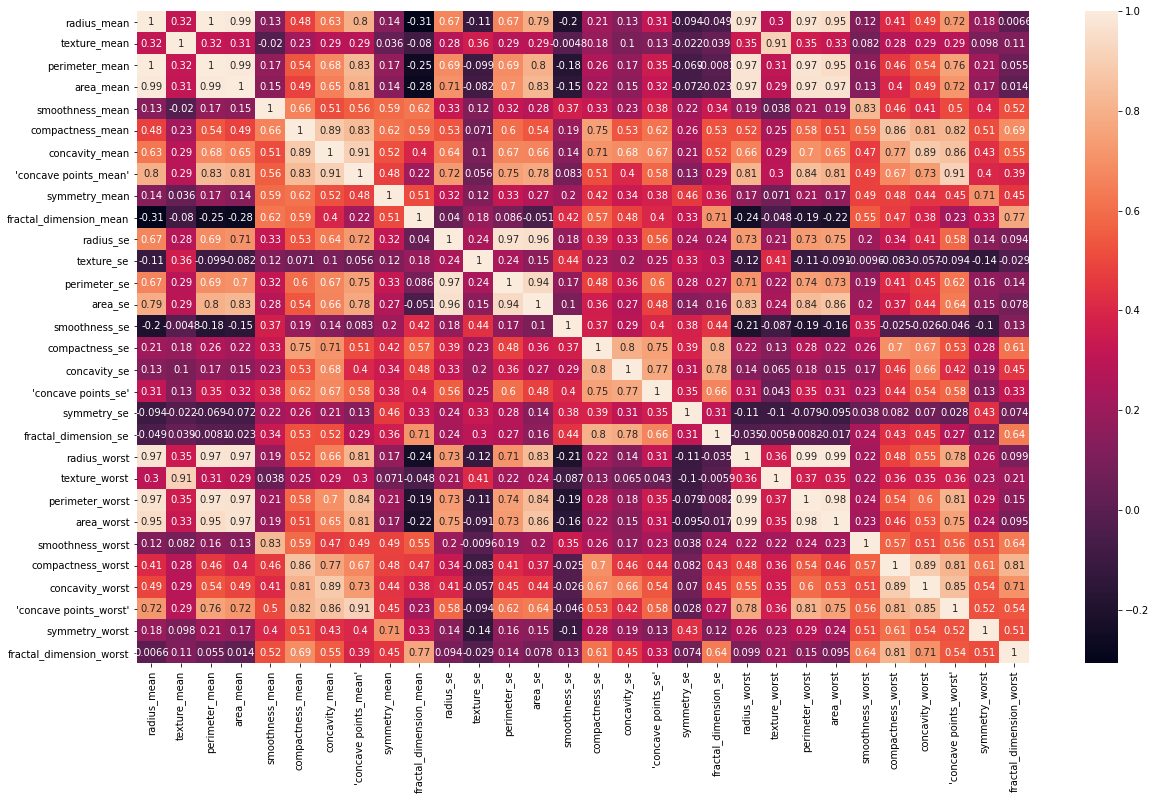

In [9]:
plt.figure(figsize=(20,12))
corr = df_cancer_train.drop(['id'], axis=1).corr()
sns.heatmap(corr, annot=True)

# diag_corr = df_cancer_train.drop(columns=['id'], axis=1).corrwith(df_cancer_train['diagnosis'])
#sns.heatmap(diag_corr, annot=True)

In [10]:
X_train = df_cancer_train.drop(['diagnosis', 'id'], axis = 1)
X_train.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,'concave points_mean',symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,'concave points_worst',symmetry_worst,fractal_dimension_worst
0,18.82,21.97,123.70,1110.0,0.10180,0.13890,0.15940,0.08744,0.1943,0.06132,...,22.66,30.93,145.3,1603.0,0.1390,0.3463,0.3912,0.17080,0.3007,0.08314
1,17.29,22.13,114.40,947.8,0.08999,0.12730,0.09697,0.07507,0.2108,0.05464,...,20.39,27.24,137.9,1295.0,0.1134,0.2867,0.2298,0.15280,0.3067,0.07484
2,14.50,10.89,94.28,640.7,0.11010,0.10990,0.08842,0.05778,0.1856,0.06402,...,15.70,15.98,102.8,745.5,0.1313,0.1788,0.2560,0.12210,0.2889,0.08006
3,17.27,25.42,112.40,928.8,0.08331,0.11090,0.12040,0.05736,0.1467,0.05407,...,20.38,35.46,132.8,1284.0,0.1436,0.4122,0.5036,0.17390,0.2500,0.07944
4,12.67,17.30,81.25,489.9,0.10280,0.07664,0.03193,0.02107,0.1707,0.05984,...,13.71,21.10,88.7,574.4,0.1384,0.1212,0.1020,0.05602,0.2688,0.06888


In [11]:
y_train = df_cancer_train['diagnosis']
y_train.head()

0    M
1    M
2    B
3    M
4    B
Name: diagnosis, dtype: object

In [12]:
X_test = df_cancer_test.drop(['diagnosis', 'id'], axis = 1)
X_test.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,'concave points_mean',symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,'concave points_worst',symmetry_worst,fractal_dimension_worst
0,11.600,18.36,73.88,412.7,0.08508,0.05855,0.03367,0.01777,0.1516,0.05859,...,12.77,24.02,82.68,495.1,0.1342,0.1808,0.1860,0.08288,0.3210,0.07863
1,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902
2,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758
3,9.904,18.06,64.60,302.4,0.09699,0.12940,0.13070,0.03716,0.1669,0.08116,...,11.26,24.39,73.07,390.2,0.1301,0.2950,0.3486,0.09910,0.2614,0.11620
4,14.340,13.47,92.51,641.2,0.09906,0.07624,0.05724,0.04603,0.2075,0.05448,...,16.77,16.90,110.40,873.2,0.1297,0.1525,0.1632,0.10870,0.3062,0.06072


In [13]:
y_test = df_cancer_test['diagnosis']
y_test.head()

0    B
1    M
2    M
3    B
4    B
Name: diagnosis, dtype: object

In [14]:
from sklearn.svm import SVC

svc_model = SVC()

In [15]:
svc_model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [16]:
y_predict = svc_model.predict(X_test)
y_predict

array(['B', 'M', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'M', 'B', 'M',
       'B', 'B', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'M',
       'B', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B',
       'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'M',
       'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B',
       'M', 'B', 'B', 'M', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'M', 'B',
       'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B',
       'M', 'M', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'M',
       'B', 'B'], dtype=object)

In [17]:
from sklearn.metrics import classification_report, confusion_matrix


cm = np.array(confusion_matrix(y_test, y_predict, labels=['M','B']))
confusion = pd.DataFrame(cm, index=['is_cancer', 'is_healthy'],
                         columns=['predicted_cancer','predicted_healthy'])
confusion

,predicted_cancer,predicted_healthy
is_cancer,54,13
is_healthy,1,103


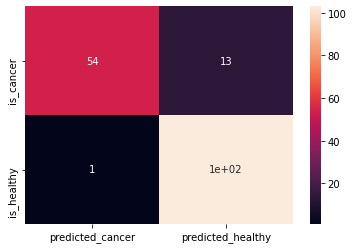

In [18]:
sns.heatmap(confusion, annot=True)

In [19]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           B       0.89      0.99      0.94       104
           M       0.98      0.81      0.89        67

    accuracy                           0.92       171
   macro avg       0.93      0.90      0.91       171
weighted avg       0.92      0.92      0.92       171



# Normalize Training Data

In [20]:
X_train_min = X_train.min()
X_train_min

radius_mean                  6.981000
texture_mean                10.380000
perimeter_mean              43.790000
area_mean                  143.500000
smoothness_mean              0.062510
compactness_mean             0.019380
concavity_mean               0.000000
'concave points_mean'        0.000000
symmetry_mean                0.106000
fractal_dimension_mean       0.050240
radius_se                    0.111500
texture_se                   0.362100
perimeter_se                 0.757000
area_se                      6.802000
smoothness_se                0.002667
compactness_se               0.002252
concavity_se                 0.000000
'concave points_se'          0.000000
symmetry_se                  0.007882
fractal_dimension_se         0.000895
radius_worst                 7.930000
texture_worst               12.490000
perimeter_worst             50.410000
area_worst                 185.200000
smoothness_worst             0.081250
compactness_worst            0.034320
concavity_wo

In [21]:
X_train_max = X_train.max()
X_train_max

radius_mean                  25.73000
texture_mean                 39.28000
perimeter_mean              174.20000
area_mean                  2010.00000
smoothness_mean               0.16340
compactness_mean              0.34540
concavity_mean                0.42680
'concave points_mean'         0.20120
symmetry_mean                 0.29060
fractal_dimension_mean        0.09744
radius_se                     1.50900
texture_se                    3.89600
perimeter_se                 10.12000
area_se                     233.00000
smoothness_se                 0.03113
compactness_se                0.10060
concavity_se                  0.39600
'concave points_se'           0.05279
symmetry_se                   0.07895
fractal_dimension_se          0.02984
radius_worst                 33.13000
texture_worst                45.41000
perimeter_worst             229.30000
area_worst                 3234.00000
smoothness_worst              0.22260
compactness_worst             1.05800
concavity_wo

In [22]:
X_train_range = (X_train_max - X_train_min)
X_train_range

radius_mean                  18.749000
texture_mean                 28.900000
perimeter_mean              130.410000
area_mean                  1866.500000
smoothness_mean               0.100890
compactness_mean              0.326020
concavity_mean                0.426800
'concave points_mean'         0.201200
symmetry_mean                 0.184600
fractal_dimension_mean        0.047200
radius_se                     1.397500
texture_se                    3.533900
perimeter_se                  9.363000
area_se                     226.198000
smoothness_se                 0.028463
compactness_se                0.098348
concavity_se                  0.396000
'concave points_se'           0.052790
symmetry_se                   0.071068
fractal_dimension_se          0.028945
radius_worst                 25.200000
texture_worst                32.920000
perimeter_worst             178.890000
area_worst                 3048.800000
smoothness_worst              0.141350
compactness_worst        

In [23]:
X_train_scaled = (X_train - X_train_min)/(X_train_range)
X_train_scaled.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,'concave points_mean',symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,'concave points_worst',symmetry_worst,fractal_dimension_worst
0,0.631447,0.401038,0.612760,0.517814,0.389434,0.366603,0.373477,0.434592,0.478332,0.234746,...,0.584524,0.560146,0.530438,0.465035,0.408560,0.304763,0.312460,0.595745,0.284250,0.184311
1,0.549843,0.406574,0.541446,0.430913,0.272376,0.331023,0.227202,0.373111,0.567714,0.093220,...,0.494444,0.448056,0.489071,0.364012,0.227450,0.246542,0.183546,0.532961,0.296077,0.129870
2,0.401035,0.017647,0.387164,0.266381,0.471702,0.277652,0.207170,0.287177,0.431203,0.291949,...,0.308333,0.106015,0.292862,0.183777,0.354086,0.141138,0.204473,0.425881,0.260990,0.164109
3,0.548776,0.520415,0.526110,0.420734,0.206165,0.280719,0.282099,0.285089,0.220477,0.081144,...,0.494048,0.697752,0.460562,0.360404,0.441104,0.369139,0.402236,0.606557,0.184309,0.160042
4,0.303430,0.239446,0.287248,0.185588,0.399346,0.175633,0.074813,0.104722,0.350488,0.203390,...,0.229365,0.261543,0.214042,0.127657,0.404316,0.084870,0.081470,0.195396,0.221368,0.090778


In [24]:
X_test_min = X_test.min()
X_test_range = (X_test - X_test_min).max()
X_test_scaled = (X_test - X_test_min)/X_test_range

In [25]:
svc_model = SVC()
svc_model.fit(X_train_scaled, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [26]:
y_predict = svc_model.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_predict)

In [27]:
cm = np.array(confusion_matrix(y_test, y_predict, labels=['M','B']))
confusion = pd.DataFrame(cm, index=['is_cancer', 'is_healthy'],
                         columns=['predicted_cancer','predicted_healthy'])
confusion

,predicted_cancer,predicted_healthy
is_cancer,62,5
is_healthy,2,102


              precision    recall  f1-score   support

           B       0.95      0.98      0.97       104
           M       0.97      0.93      0.95        67

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



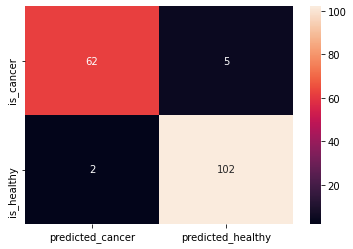

In [28]:
print(classification_report(y_test,y_predict))
sns.heatmap(confusion,annot=True,fmt="d")

# Gridsearch Model

In [29]:
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf', 'linear']}
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=1)
grid.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed:    1.2s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'linear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [30]:
print (grid.best_params_)
print ('\n')
print (grid.best_estimator_)


{'C': 10, 'gamma': 1, 'kernel': 'rbf'}


SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)


              precision    recall  f1-score   support

           B       0.97      0.99      0.98       104
           M       0.98      0.96      0.97        67

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.98       171
weighted avg       0.98      0.98      0.98       171

svc_score: 0.9766081871345029


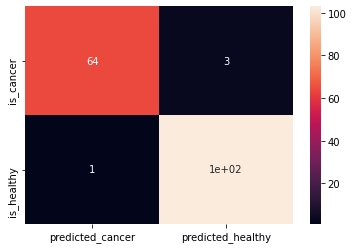

In [31]:
grid_predictions = grid.predict(X_test_scaled)
cm = np.array(confusion_matrix(y_test, grid_predictions, labels=['M', 'B']))
confusion = pd.DataFrame(cm, index=['is_cancer', 'is_healthy'],
                         columns=['predicted_cancer','predicted_healthy'])
confusion

sns.heatmap(confusion, annot=True)
print(classification_report(y_test,grid_predictions))

svc_accuracy_score = grid.score(X_test_scaled, y_test)
print(f"svc_accuracy_score: {svc_accuracy_score}")

## Bagging

In [32]:
from sklearn.ensemble import BaggingClassifier

param_grid = {
                'n_estimators': [50, 80, 100],
                'max_samples': [0.2, 0.5, 1.0],
                'max_features': [0.2, 0.5, 1.0],
            } 


best_svc = SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

model_bagging_svc = BaggingClassifier(base_estimator=best_svc)
grid = GridSearchCV(model_bagging_svc, param_grid, refit=True, verbose=1)


grid.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:   27.1s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=BaggingClassifier(base_estimator=SVC(C=10,
                                                            break_ties=False,
                                                            cache_size=200,
                                                            class_weight=None,
                                                            coef0=0.0,
                                                            decision_function_shape='ovr',
                                                            degree=3, gamma=1,
                                                            kernel='rbf',
                                                            max_iter=-1,
                                                            probability=False,
                                                            random_state=None,
                                                            shrinking=True,
                                        

In [33]:
print (grid.best_params_)
print ('\n')
print (grid.best_estimator_)

{'max_features': 1.0, 'max_samples': 0.5, 'n_estimators': 50}


BaggingClassifier(base_estimator=SVC(C=10, break_ties=False, cache_size=200,
                                     class_weight=None, coef0=0.0,
                                     decision_function_shape='ovr', degree=3,
                                     gamma=1, kernel='rbf', max_iter=-1,
                                     probability=False, random_state=None,
                                     shrinking=True, tol=0.001, verbose=False),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=0.5, n_estimators=50, n_jobs=None,
                  oob_score=False, random_state=None, verbose=0,
                  warm_start=False)


In [34]:
grid_predictions = grid.predict(X_test_scaled)

In [35]:
cm = np.array(confusion_matrix(y_test, grid_predictions, labels=['M', 'B']))
confusion = pd.DataFrame(cm, index=['is_cancer', 'is_healthy'],
                         columns=['predicted_cancer','predicted_healthy'])
confusion

,predicted_cancer,predicted_healthy
is_cancer,61,6
is_healthy,1,103


              precision    recall  f1-score   support

           B       0.94      0.99      0.97       104
           M       0.98      0.91      0.95        67

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171

svc_score: 0.9590643274853801


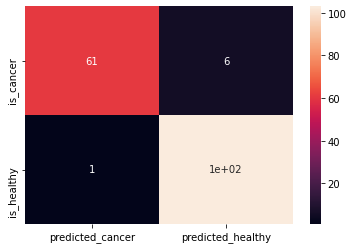

In [36]:
sns.heatmap(confusion, annot=True)
print(classification_report(y_test,grid_predictions))

bagging_svc_accuracy_score = grid.score(X_test_scaled, y_test)
print(f"svc_accuracy_score: {bagging_svc_accuracy_score}")

## Boosting

In [40]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

param_grid = {
                'n_estimators': [20, 50, 100],
                'max_features': [0.2, 0.5, 1.0],
                'learning_rate': [0.2, 0.5, 1.0],
                'max_depth': [2, 3, 4, 5]
             }

grid = GridSearchCV(GradientBoostingClassifier(), param_grid, refit=True, verbose=1)


grid.fit(X_train_scaled,y_train)

print (grid.best_params_)
print ('\n')
print (grid.best_estimator_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 540 out of 540 | elapsed:   56.1s finished


{'learning_rate': 0.1, 'max_depth': 5, 'max_features': 0.5, 'n_estimators': 50}


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=5,
                           max_features=0.5, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=50,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


In [54]:
grid_predictions = grid.predict(X_test_scaled)
cm = np.array(confusion_matrix(y_test, grid_predictions, labels=['M', 'B']))
confusion = pd.DataFrame(cm, index=['is_cancer', 'is_healthy'],
                         columns=['predicted_cancer','predicted_healthy'])
confusion

AttributeError: 'GridSearchCV' object has no attribute 'predict_classes'

In [45]:
param_grid = {
                'n_estimators': [20, 50, 100],
                'learning_rate': [0.2, 0.5, 1.0],
                'algorithm': ['SAMME']
             }

best_svc = SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
                decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
                probability=False, random_state=None, shrinking=True, tol=0.001,
                verbose=False)

grid_adaboost = GridSearchCV(AdaBoostClassifier(base_estimator=best_svc), param_grid, refit=True, verbose=1)



grid_adaboost.fit(X_train_scaled,y_train)

print (grid_adaboost.best_params_)
print ('\n')
print (grid_adaboost.best_estimator_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:   48.3s finished


{'algorithm': 'SAMME', 'learning_rate': 1.0, 'n_estimators': 20}


AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=SVC(C=10, break_ties=False, cache_size=200,
                                      class_weight=None, coef0=0.0,
                                      decision_function_shape='ovr', degree=3,
                                      gamma=1, kernel='rbf', max_iter=-1,
                                      probability=False, random_state=None,
                                      shrinking=True, tol=0.001,
                                      verbose=False),
                   learning_rate=1.0, n_estimators=20, random_state=None)


In [47]:
grid_predictions = grid_adaboost.predict(X_test_scaled)
cm = np.array(confusion_matrix(y_test, grid_predictions, labels=['M', 'B']))
confusion = pd.DataFrame(cm, index=['is_cancer', 'is_healthy'],
                         columns=['predicted_cancer','predicted_healthy'])
confusion

,predicted_cancer,predicted_healthy
is_cancer,56,11
is_healthy,0,104


              precision    recall  f1-score   support

           B       0.90      1.00      0.95       104
           M       1.00      0.84      0.91        67

    accuracy                           0.94       171
   macro avg       0.95      0.92      0.93       171
weighted avg       0.94      0.94      0.93       171

svc_score: 0.935672514619883


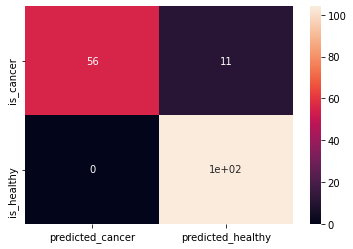

In [48]:
sns.heatmap(confusion, annot=True)
print(classification_report(y_test,grid_predictions))

boosting_svc_accuracy_score = grid_adaboost.score(X_test_scaled, y_test)
print(f"boosting_svc_accuracy_score: {boosting_svc_accuracy_score}")

# K-Fold Cross Validation

In [50]:
from sklearn.model_selection import KFold

K = 5
kf = KFold(n_splits=K) # Define the split

kf.get_n_splits(X_train_scaled) # returns the number of splitting iterations in the cross-validator
print(kf)



KFold(n_splits=5, random_state=None, shuffle=False)


In [66]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score

accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
cohen_kappa_scores = []
roc_auc_scores = []



best_svc = SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)
# SVC K-Fold R2 score: 0.9749050633


# {'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 50}
best_bagging_svc = BaggingClassifier(base_estimator=best_svc,
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=0.2, n_estimators=100, n_jobs=None,
                  oob_score=False, random_state=314, verbose=0,
                  warm_start=False)
# SVC K-Fold R2 score: 0.9723734177


# {'learning_rate': 0.5, 'max_depth': 2, 'max_features': 0.2, 'n_estimators': 100}
best_gradient_boosting = GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.5, loss='deviance', max_depth=2,
                           max_features=0.2, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
# SVC K-Fold R2 score: 0.9649050633


best_ada_boosting = AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=SVC(C=10, break_ties=False, cache_size=200,
                                      class_weight=None, coef0=0.0,
                                      decision_function_shape='ovr', degree=3,
                                      gamma=1, kernel='rbf', max_iter=-1,
                                      probability=False, random_state=None,
                                      shrinking=True, tol=0.001,
                                      verbose=False),
                   learning_rate=1.0, n_estimators=20, random_state=None)
# SVC K-Fold R2 score: 0.9548417722



k_fold_model = best_ada_boosting

for train_index, test_index in kf.split(X_train_scaled):   
    X_k_train = X_train_scaled[X_train_scaled.index.isin(train_index)]
    y_k_train = y_train[y_train.index.isin(train_index)]
    
    X_k_test = X_train_scaled[X_train_scaled.index.isin(test_index)]
    y_k_test = y_train[y_train.index.isin(test_index)]
    
    print(f"TRAIN: {len(train_index)}, TEST: {len(test_index)}, X_k_train: {X_k_train.shape}, X_k_test: {X_k_test.shape}")
   
    k_fold_model.fit(X_k_train, y_k_train)
    predictions = k_fold_model.predict(X_k_test)
    predictions_proba = k_fold_model.predict_proba(X_k_test)
    
    accuracy_scores.append(accuracy_score(y_k_test, predictions))
    precision_scores.append(precision_score(y_k_test, predictions, average="macro"))
    recall_scores.append(recall_score(y_k_test, predictions, average="macro"))
    f1_scores.append(f1_score(y_k_test, predictions, average="macro"))
    roc_auc_scores.append(roc_auc_score(y_k_test, predictions_proba[:,1]))
    
    
#     s = k_fold_model.score(X_k_test, y_k_test)
#     accuracy_scores.append(s)
    
print(f"SVC K-Fold mean_accuracy_score: {np.round(np.mean(accuracy_scores), 3)}, accuracy_scores: {accuracy_scores}")
print(f"SVC K-Fold mean_precision_score: {np.round(np.mean(precision_scores), 3)}, precision_scores: {precision_scores}")
print(f"SVC K-Fold mean_recall_score: {np.round(np.mean(recall_scores), 3)}, recall_scores: {recall_scores}")
print(f"SVC K-Fold mean_f1_score: {np.round(np.mean(f1_scores), 3)}, f1_scores: {f1_scores}")
print(f"SVC K-Fold mean_roc_auc_score: {np.round(np.mean(roc_auc_scores), 3)}, roc_auc_scores: {roc_auc_scores}")

TRAIN: 318, TEST: 80, X_k_train: (318, 30), X_k_test: (80, 30)
TRAIN: 318, TEST: 80, X_k_train: (318, 30), X_k_test: (80, 30)
TRAIN: 318, TEST: 80, X_k_train: (318, 30), X_k_test: (80, 30)
TRAIN: 319, TEST: 79, X_k_train: (319, 30), X_k_test: (79, 30)
TRAIN: 319, TEST: 79, X_k_train: (319, 30), X_k_test: (79, 30)
SVC K-Fold mean_accuracy_score: 0.955, accuracy_scores: [0.9, 0.975, 0.9625, 0.9746835443037974, 0.9620253164556962]
SVC K-Fold mean_precision_score: 0.952, precision_scores: [0.890625, 0.9841269841269842, 0.9594594594594594, 0.9655172413793103, 0.960594315245478]
SVC K-Fold mean_recall_score: 0.952, recall_scores: [0.9, 0.9473684210526316, 0.9673913043478262, 0.9807692307692308, 0.9629870129870131]
SVC K-Fold mean_f1_score: 0.951, f1_scores: [0.8946675444371297, 0.9641577060931898, 0.96201930685235, 0.9723389355742297, 0.961631860126275]
SVC K-Fold mean_roc_auc_score: 0.984, roc_auc_scores: [0.9776666666666667, 0.9784296807592753, 0.9932864450127877, 0.9875356125356126, 0.985

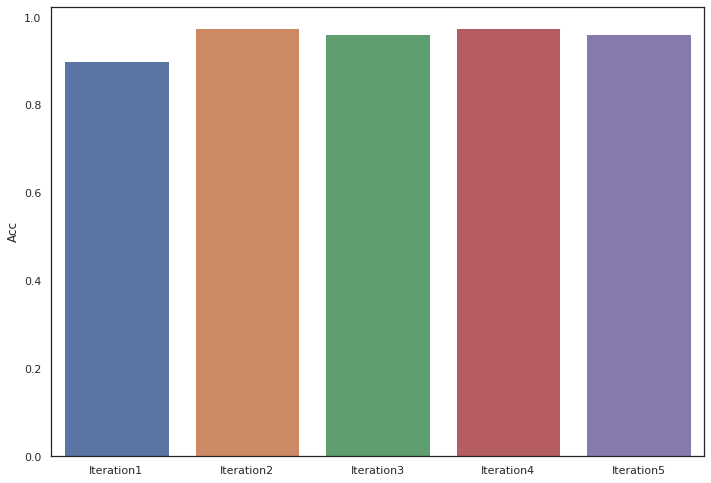

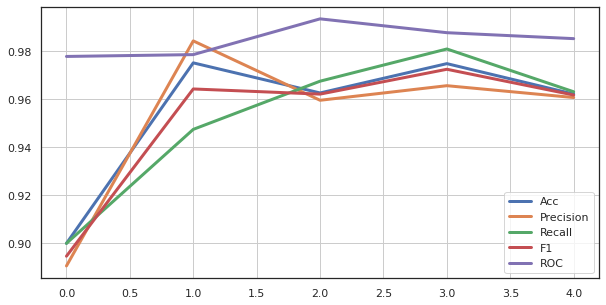

In [77]:
### Visualize accuracy for each iteration
data = {
    'Acc': accuracy_scores,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1': f1_scores,
    'ROC': roc_auc_scores
}
scores_df = pd.DataFrame(data, columns=['Acc', 'Precision', 'Recall', 'F1', 'ROC'])
 
sns.set(style="white", rc={"lines.linewidth": 3, 'figure.figsize':(11.7,8.27)})
sns.barplot(x=[f"Iteration{i+1}" for i, row in enumerate(scores_df.values) ],y="Acc", data=scores_df)
plt.show()

# scores_df.plot(x=scores_df.index, y=["Acc", "F1"], kind="bar")
scores_df.plot(figsize=(10,5), grid=True)